# Topic Coherence in Practice

In this section, we will evaluate some topics using the `20newsgroups` dataset as a reference corpus to illustrate topic coherence in practice. We will first preprocess the data and then create some random topics. Finally, we will compute the coherence scores for these topics using Gensim's CoherenceModel.


In [3]:
%config InlineBackend.figure_format='retina'

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

## Loading the Data

We first load and preprocess the `20newsgroups` dataset by removing headers, footers, and quotes, tokenizing the texts, and removing stopwords.


In [4]:
# Load the 20newsgroups dataset and preprocess the texts
texts, _ = fetch_20newsgroups(
    subset="all", remove=("headers", "footers", "quotes"), return_X_y=True
)
tokenizer = lambda s: re.findall("\w+", s.lower())
texts = [tokenizer(t) for t in texts]
stopwords = set(stopwords.words("english"))
texts = [[w for w in t if w not in stopwords and len(w) > 1] for t in texts]


Then, we find collocations in the texts and display the top 10 collocations.


In [5]:
# Find collocations in the texts
finder = BigramCollocationFinder.from_words(sum(texts[:100], []))
bgm = BigramAssocMeasures()
score = bgm.mi_like
collocations = {"_".join(bigram): pmi for bigram, pmi in finder.score_ngrams(score)}


In [6]:
# Top 10 collocations
collocations = pd.DataFrame(
    sorted(collocations.items(), key=lambda x: x[1], reverse=True),
    columns=["bigram", "score"],
)
collocations.head(10)


,bigram,score
0,united_states,7.111111
1,et_al,5.142857
2,greatly_appreciated,3.000000
3,hymenaeus_beta,3.000000
4,proving_existence,3.000000
5,3d_studio,2.666667
6,mozumder_proving,2.250000
7,_equinox_iii,2.000000
8,alex_delvecchio,2.000000
9,annals_cirp,2.000000


## Computing Coherence Scores

Next, we create some random topics and a dictionary with the vocabulary of the texts. We instantiate the CoherenceModel with the topics, texts, and dictionary, specifying the coherence measure as "c_v". We compute the coherence scores for each topic and prepare the data for visualization.


In [7]:
# Create some random topics
topics = [
    ["space", "planet", "mars", "galaxy"],
    ["cold", "medicine", "doctor", "health", "water"],
    ["cats", "health", "keyboard", "car", "banana"],
    ["windows", "mac", "computer", "operating", "system"],
]

# Create a dictionary with the vocabulary
word2id = Dictionary(texts)

# Instantiate the CoherenceModel
cm = CoherenceModel(topics=topics, texts=texts, coherence="c_v", dictionary=word2id)

# Compute coherence scores per topic
coherence_per_topic = cm.get_coherence_per_topic()


## Visualizing the Coherence Scores

Finally, we visualize the coherence scores in a heatmap. Each row represents a topic, and the color intensity indicates the coherence score. The darker the color, the higher the coherence score. This provides an easy way to visually compare the coherence of different topics.


In [8]:
# Prepare the data for visualization
topics_str = ["\n ".join(t) for t in topics]
data_topic_score = pd.DataFrame(
    data=zip(topics_str, coherence_per_topic), columns=["Topic", "Coherence"]
)
data_topic_score = data_topic_score.set_index("Topic")


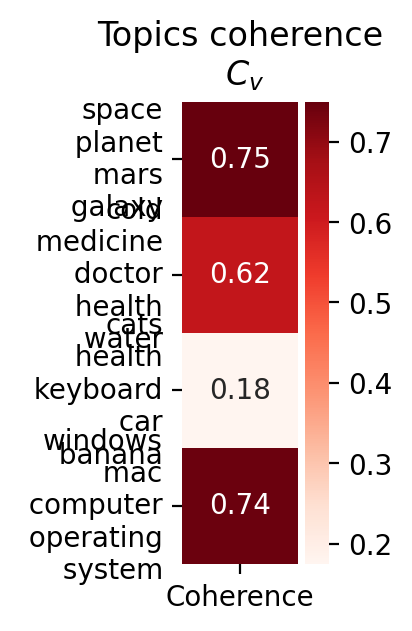

In [10]:
# Visualize the coherence scores
fig, ax = plt.subplots(figsize=(1, 3))
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(
    data=data_topic_score,
    annot=True,
    square=True,
    cmap="Reds",
    fmt=".2f",
    linecolor="black",
    ax=ax,
)
plt.yticks(rotation=0)
ax.set_xlabel("")
ax.set_ylabel("")
fig.show()

From the heatmap, we can observe that the first topic, related to space, has the highest coherence score, indicating that the words in this topic are more related to each other compared to the other topics. The third topic, with a mix of unrelated words, has the lowest coherence score, which aligns with our expectation that the words in this topic do not form a coherent concept.

## Summary

By calculating topic coherence scores, we can gain insights into the quality of the topics generated by a topic model. Higher coherence scores indicate that the words in the topic are more related to each other, forming a coherent concept, while lower coherence scores suggest that the words in the topic may not be related or form a clear concept.
